# Sai Giridhar Notes for Machine Learning Classification from Scratch

# Resources being used to learn doing ML Classification from Scratch
# Web sites
* Code: https://www.kdnuggets.com/2017/02/learned-implementing-classifier-scratch-python.html
* Study: https://en.wikipedia.org/wiki/Iris_flower_data_set
* Study: https://see.stanford.edu/Course/CS229
* Study: [IMPORTANT] https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf
* Study: [IMPORTANT] https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
* Study: https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
* Study: About addition of l2 regularization and multiclass classification. https://github.com/martinpella/logistic-reg

# Steps in this:
+ Preprocessing
+ Learning 
+ Evaluation
+ Prediction

# Part 1 - Preprocessing

Step in Preprocessing data:
* Extract features from raw data
* Clean and format the data
* Remove superfluous features (or highly correlated features)
* Reduce the number of features for performance
* Standardize the range of feature data (also named Feature Scaling)
* Split your dataset randomly: training dataset and test dataset

In [1]:
# Prerequsite Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn

In [2]:
# deriving the data

dataset = sklearn.datasets.load_iris()

In [7]:
dataset.data.shape

(150, 4)

In [4]:
# Column Legend: petal length, petal width, sepal length, sepal width and species

print(dataset.feature_names)
print(dataset.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
# Getting the features and target (Species of Flower)
X = dataset.data[:,:2]
y = dataset.target

In [16]:
X=pd.DataFrame(X)

In [36]:
X.isna().sum()

0    0
1    0
dtype: int64

In [7]:
# Raw visualization of data
X, y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [8]:
# Graphical visualization of the Iris data

# load csv data
iris = pd.read_csv("Iris.csv")
iris.info()

# change the target from string to int
iris['Species'] = iris['Species'].astype('category')
iris['target'] = pd.Categorical(iris['Species'])
iris['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: target, dtype: int64

In [9]:
# Example iris data - just to check
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


Text(0.5, 1.0, 'Original Iris Dataset')

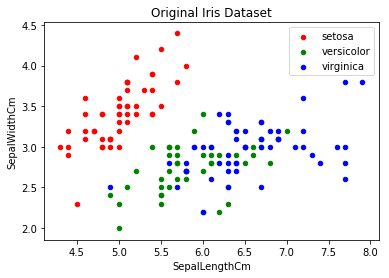

In [10]:
# Visualizing using Pandas 
# scatter plot using pandas

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("Original Iris Dataset")

# Note

# Clearly from the scatter plot above, the Versicolor and Virginica are linearly non-seperable. So, let's build the model to predict Setosa Vs Versicolor + virginica.

In [11]:
# Converting 1 Versicolor , 2 virginica to Versicolor+Virginica.
#y = (iris.target != 0) * 1
y = (dataset.target != 0) * 1

In [12]:
# Verifying y (if it is only of two Categories 0 Setosa, 1+2 Versicolor+Virginica)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Building the Scatterplot again

In [13]:
X, y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


Text(0.5, 1.0, 'Original Iris Dataset')

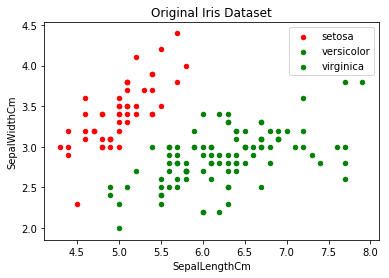

In [14]:
# Visualizing using Pandas 
# scatter plot using pandas

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='virginica', ax=ax)
ax.set_title("Original Iris Dataset")

# Part 2 - Learning 
# Implementing the logic for the Logistic Regression

Sigmoid function returns values that could only reach a least of 0 and a max of 1
So, Sigmoid function takes in Theta Transpose * X and perform the 1/1+ e ^ -(Theta Transpose * X)

In [15]:
# Including all the Sigmoid function, loss function, gradient, predictors
# Refer to the Logistic Regression session in the https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf for formula

In [16]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.verbose = verbose
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold 

# Part 3 - Prediction

In [17]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(X, y)

CPU times: user 3.56 s, sys: 3.35 ms, total: 3.57 s
Wall time: 3.57 s


In [18]:
preds = model.predict(X, 0.5)
# 0.5 is the threshold

In [19]:
preds 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
preds = list(preds)

y = list(y)


In [22]:
preds.count(False), preds.count(True)

(50, 100)

In [23]:
y.count(0), y.count(1)

(50, 100)

# Results
Picking a learning rate = 0.1 and 
number of iterations = 300000 
We got all the data classified correctly

# Lets check the weights

In [24]:
model.theta
# Theta 0, Theta 1, Theta 2.

array([-25.89066442,  12.523156  , -13.40150447])

# Part 4 - Evaluation

# Splitting into train and test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)

In [27]:
print(X_train[:,:2].shape)
print(X_test[:,:2].shape)
print(len(y_train))
print(len(y_test))

(127, 2)
(23, 2)
127
23


In [28]:
# Getting the features and target (Species of Flower)
X = dataset.data[:,:2]
y = dataset.target
X, y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [30]:
# Training the model on the training dataset
model = LogisticRegression(lr=0.1, num_iter=300000)
# as in the class above, y_train is considered a np.array and we have y.size
y_train = np.array(y_train)
%time model.fit(X_train, y_train)

CPU times: user 3.24 s, sys: 3.72 ms, total: 3.24 s
Wall time: 3.24 s


In [31]:
preds_validation = model.predict(X_test, 0.5)

In [32]:
preds_validation = list(preds_validation)
preds_validation

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True]

In [33]:
preds_validation.count(False), preds_validation.count(True)

(4, 19)

In [34]:
# converting all 2 into 1
y_test = list(y_test)
#y_test = [1 for ele in y_test if ele>1]
y_test

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [35]:
y_test.count(0), y_test.count(1) + y_test.count(2)

(4, 19)

# Accuracy on Validation Dataset

In [36]:
y_test_modif = [True if i>0 else False for i in y_test ]

In [37]:
y_test_modif

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True]

In [38]:
# Calculation Accuracy
(np.array(preds_validation) == np.array(y_test_modif)).mean()

1.0

# Comparing the Sklearn Model performance to Scratch Model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier = LogisticRegression(random_state = 0)

In [45]:
X_train, y_train

(array([[4.3, 3. ],
        [6.7, 3. ],
        [4.7, 3.2],
        [6.3, 3.4],
        [5.8, 2.7],
        [5.5, 3.5],
        [5.6, 3. ],
        [5.7, 2.5],
        [4.9, 3.6],
        [5.9, 3. ],
        [5.2, 2.7],
        [5.8, 4. ],
        [5. , 3.5],
        [6. , 3. ],
        [7.7, 2.8],
        [4.8, 3.1],
        [6.8, 3.2],
        [5. , 3. ],
        [5.8, 2.7],
        [6.1, 2.8],
        [5.6, 2.9],
        [5.5, 4.2],
        [7.9, 3.8],
        [5.1, 3.8],
        [5.8, 2.8],
        [5.6, 2.7],
        [6.7, 2.5],
        [6.4, 3.2],
        [5.7, 4.4],
        [5.7, 2.8],
        [6.5, 2.8],
        [4.4, 3. ],
        [5. , 2.3],
        [6.6, 2.9],
        [6.5, 3. ],
        [5.2, 3.5],
        [4.6, 3.6],
        [6.2, 2.2],
        [5.4, 3. ],
        [4.4, 3.2],
        [4.8, 3.4],
        [5.1, 3.5],
        [4.6, 3.4],
        [4.5, 2.3],
        [7.7, 2.6],
        [5.2, 4.1],
        [7.2, 3. ],
        [6.7, 3.3],
        [5.9, 3. ],
        [5.1, 2.5],


(array([[4.3, 3. ],
        [6.7, 3. ],
        [4.7, 3.2],
        [6.3, 3.4],
        [5.8, 2.7],
        [5.5, 3.5],
        [5.6, 3. ],
        [5.7, 2.5],
        [4.9, 3.6],
        [5.9, 3. ],
        [5.2, 2.7],
        [5.8, 4. ],
        [5. , 3.5],
        [6. , 3. ],
        [7.7, 2.8],
        [4.8, 3.1],
        [6.8, 3.2],
        [5. , 3. ],
        [5.8, 2.7],
        [6.1, 2.8],
        [5.6, 2.9],
        [5.5, 4.2],
        [7.9, 3.8],
        [5.1, 3.8],
        [5.8, 2.8],
        [5.6, 2.7],
        [6.7, 2.5],
        [6.4, 3.2],
        [5.7, 4.4],
        [5.7, 2.8],
        [6.5, 2.8],
        [4.4, 3. ],
        [5. , 2.3],
        [6.6, 2.9],
        [6.5, 3. ],
        [5.2, 3.5],
        [4.6, 3.6],
        [6.2, 2.2],
        [5.4, 3. ],
        [4.4, 3.2],
        [4.8, 3.4],
        [5.1, 3.5],
        [4.6, 3.4],
        [4.5, 2.3],
        [7.7, 2.6],
        [5.2, 4.1],
        [7.2, 3. ],
        [6.7, 3.3],
        [5.9, 3. ],
        [5.1, 2.5],
